In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [33]:
dataset=pd.read_csv('Data.csv')
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [36]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

Using multiple Linear Regression First

In [38]:
from sklearn.model_selection import train_test_split
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1))

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


In [104]:
# Linear Regression
results = {}
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results['Linear Regression'] = {
    'R2': r2_score(y_test, y_pred_lr),
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr))
}

Polynomial Regression

In [108]:
# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly_train = poly.transform(X_train)
X_poly_test = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
y_pred_poly = lr_poly.predict(X_poly_test)
results['Polynomial Regression'] = {
    'R2': r2_score(y_test, y_pred_poly),
    'MAE': mean_absolute_error(y_test, y_pred_poly),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_poly))
}

SVR Regression

In [59]:

y = y.reshape(-1, 1)

In [81]:
y

array([ 0.52, -0.59,  2.  , ..., -1.45, -1.09, -0.06])

In [89]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
y = y.reshape(-1, 1)
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y).ravel()


In [90]:
from sklearn.svm import SVR 
regressor=SVR(kernel='rbf')
regressor.fit(X,y)



,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [111]:
# SVR (with scaling)
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).ravel()

X_train_scaled = sc_X.transform(X_train)
X_test_scaled = sc_X.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, sc_y.transform(y_train.reshape(-1, 1)).ravel())
y_pred_svr = sc_y.inverse_transform(svr.predict(X_test_scaled).reshape(-1, 1)).ravel()
results['SVR'] = {
    'R2': r2_score(y_test, y_pred_svr),
    'MAE': mean_absolute_error(y_test, y_pred_svr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_svr))
}

Decision Tree

In [93]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [98]:
new_data = [[10.0, 50.0, 1010.0, 60.0]]
regressor.predict(new_data)
from sklearn.metrics import r2_score

# Assuming X, y, X_test, y_test are already defined and preprocessed

# 1. Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X, y)

# Predict on test data
y_pred_dt = dt_regressor.predict(X_test)

# Calculate R² for Decision Tree
r2_dt = r2_score(y_test, y_pred_dt)
print(f"R-squared (Decision Tree): {r2_dt:.4f}")

R-squared (Decision Tree): -710.6633


Random Forest

In [96]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10,random_state=0)
rf.fit(X,y)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [100]:
new_data = [[10.0, 50.0, 1010.0, 60.0]]
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=0)
rf_regressor.fit(X, y)
rf.predict(new_data)
# Predict on test data
y_pred_rf = rf_regressor.predict(X_test)

# Calculate R² for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-squared (Random Forest): {r2_rf:.4f}")

R-squared (Random Forest): -710.7429


Visualize the R squares

/var/folders/tz/vs99751553df2kc9_q7_jhk80000gn/T/ipykernel_1939/3474856215.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette='mako')


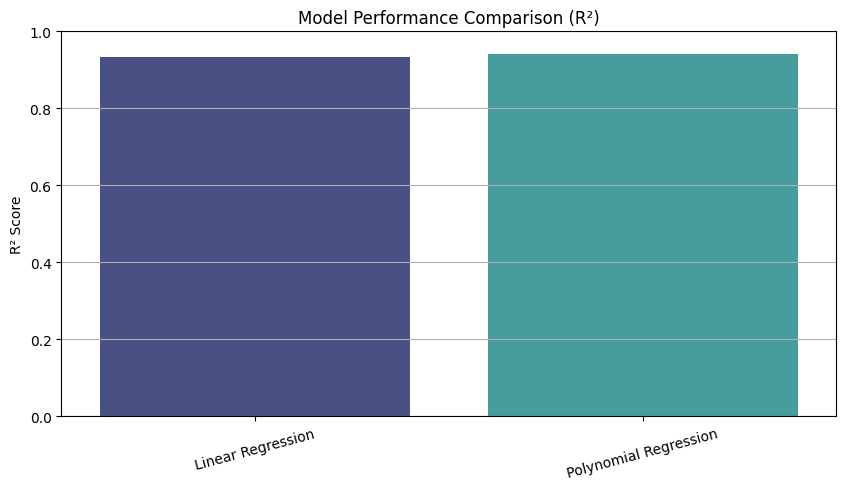

In [109]:
# Bar plot for R² scores
model_names = list(results.keys())
r2_scores = [results[model]['R2'] for model in model_names]

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=r2_scores, palette='mako')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison (R²)')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()
